<a href="https://colab.research.google.com/github/NikhilGurrapu/Discretizer_Binning/blob/main/Discretizer_Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

 # Reading dataset using pandas

In [6]:
data=pd.read_csv('/content/sample_data/titanic.csv',usecols=['Age','Fare','Survived'])

In [7]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
data.shape

(891, 3)

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(714, 3)

# Splitting dataset

In [11]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

In [13]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6289123630672926

# Binning using kmeans

In [15]:
kbin_age=KBinsDiscretizer(n_bins=12,encode='ordinal',strategy='kmeans')
kbin_fare=KBinsDiscretizer(n_bins=12,encode='ordinal',strategy='kmeans')

In [16]:
tnf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [17]:
X_train_tnf= tnf.fit_transform(X_train)
X_test_tnf= tnf.transform(X_test)

In [18]:
clf=DecisionTreeClassifier()

clf.fit(X_train_tnf,y_train)

y_pred2=clf.predict(X_test_tnf)

accuracy_score(y_test,y_pred2)

0.6293706293706294

# Accuracy_score increased after Binning the data

In [19]:
X_tnf= tnf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_tnf,y,cv=10,scoring='accuracy'))

0.6696205007824726

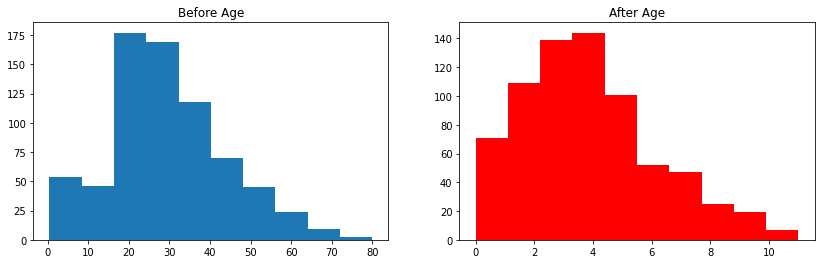

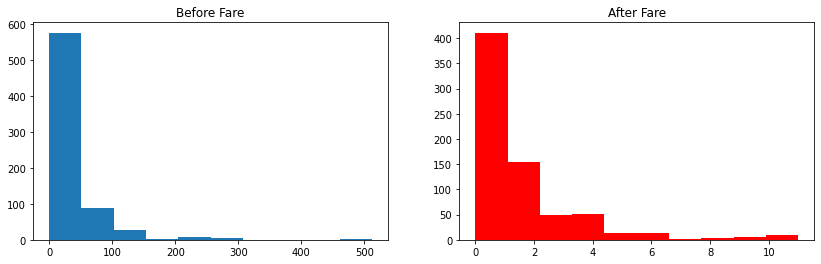

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Age'])
plt.title('Before Age')

plt.subplot(122)
plt.hist(X_tnf[:,0],color='red')
plt.title('After Age')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(X['Fare'])
plt.title('Before Fare')

plt.subplot(122)
plt.hist(X_tnf[:,1],color='red')
plt.title('After Fare')
plt.show()